# 과적합 방지 전략

## 1. 데이터 로드

In [61]:
import tensorflow as tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

vocab_size = 1000
imdb = keras.datasets.imdb
(train_datas, train_labels), (test_datas, test_labels) = imdb.load_data(num_words = vocab_size)

## 2. 멀티 핫 시퀀싱

In [62]:
def multi_hot_sequences(sequence, dimension):
    results = np.zeros((len(sequence), dimension))
    for i,word_indices in enumerate(sequence):
        results[i,word_indices] = 1.0
    return results

train_datas = multi_hot_sequences(train_datas, dimension=vocab_size)
test_datas = multi_hot_sequences(test_datas, dimension=vocab_size)

In [63]:
train_labels = np.reshape(train_labels, (-1,1))
test_labels = np.reshape(test_labels, (-1,1))

## 3. 모델 정의

In [64]:
def make_model(size=16, l2=False, dpt=False):
	model = keras.Sequential()
	
	if l2: model.add(keras.layers.Dense(size, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(vocab_size,)))
	else : model.add(keras.layers.Dense(size, activation="relu", input_shape=(vocab_size,)))

	if dpt: model.add(keras.layers.Dropout(0.5))

	if l2: model.add(keras.layers.Dense(size, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
	else: model.add(keras.layers.Dense(size, activation="relu"))

	if dpt: model.add(keras.layers.Dropout(0.5))

	model.add(keras.layers.Dense(1, activation="sigmoid"))

	model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
	return model

In [65]:
baseline_model = make_model()
smaller_model = make_model(size=4)
bigger_model = make_model(size=512)
l2_model = make_model(l2=True)
dpt_model = make_model(dpt=True)
l2_dpt_model = make_model(l2=True, dpt=True)

baseline_model.summary()
smaller_model.summary()
bigger_model.summary()
l2_model.summary()
dpt_model.summary()
l2_dpt_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 4)              │         4,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,029 (15.74 KB)

 Trainable params: 4,029 (15.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,681 (2.96 MB)

 Trainable params: 775,681 (2.96 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 학습

In [66]:
models = {"baseline_model": baseline_model, 
		  "smaller_model": smaller_model,
		  "bigger_model": bigger_model,
		  "l2_model": l2_model, 
		  "dpt_model": dpt_model, 
		  "l2_dpt_model": l2_dpt_model}

histories = dict()

for name, model in models.items():
	file_path = f"model/{name}.weights.h5"
	cp_callback = keras.callbacks.ModelCheckpoint(filepath=file_path,
											   save_weights_only=True,
											   monitor="val_accuracy",
											   mode="max",
											   save_best_only=True)

	history = model.fit(train_datas,train_labels,
					 epochs=200,
					 batch_size=512,
					 validation_split=0.2,
					 callbacks=[cp_callback])
	
	histories[name] = history

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6722 - loss: 0.6131 - val_accuracy: 0.7908 - val_loss: 0.4888
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8284 - loss: 0.4127 - val_accuracy: 0.8408 - val_loss: 0.3756
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8576 - loss: 0.3403 - val_accuracy: 0.8530 - val_loss: 0.3495
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8669 - loss: 0.3178 - val_accuracy: 0.8582 - val_loss: 0.3401
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8726 - loss: 0.3050 - val_accuracy: 0.8594 - val_loss: 0.3392
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8727 - loss: 0.3026 - val_accuracy: 0.8630 - val_loss: 0.3345
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8791 - loss: 0.2939 - val_accuracy: 0.8634 - val_loss: 0.3331
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8802 - loss: 0.2902 - val_accuracy: 0.8628 - 

In [67]:
results = dict()
for name, model in models.items():
	model_path = f"model/{name}.weights.h5"
	model.load_weights(model_path)
	result = model.evaluate(test_datas,test_labels)
	results[name] = result[1]

best_model_name = max(results.keys(), key=results.get)
best_acc = results[best_model_name]
print(f"name : {best_model_name}	acc : {best_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3376
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8587 - loss: 0.3325
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8575 - loss: 0.3301
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8568 - loss: 0.3747
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8576 - loss: 0.3442
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3592
name : l2_dpt_model	acc : 0.8608800172805786


## 5. 결과 그래프 출력

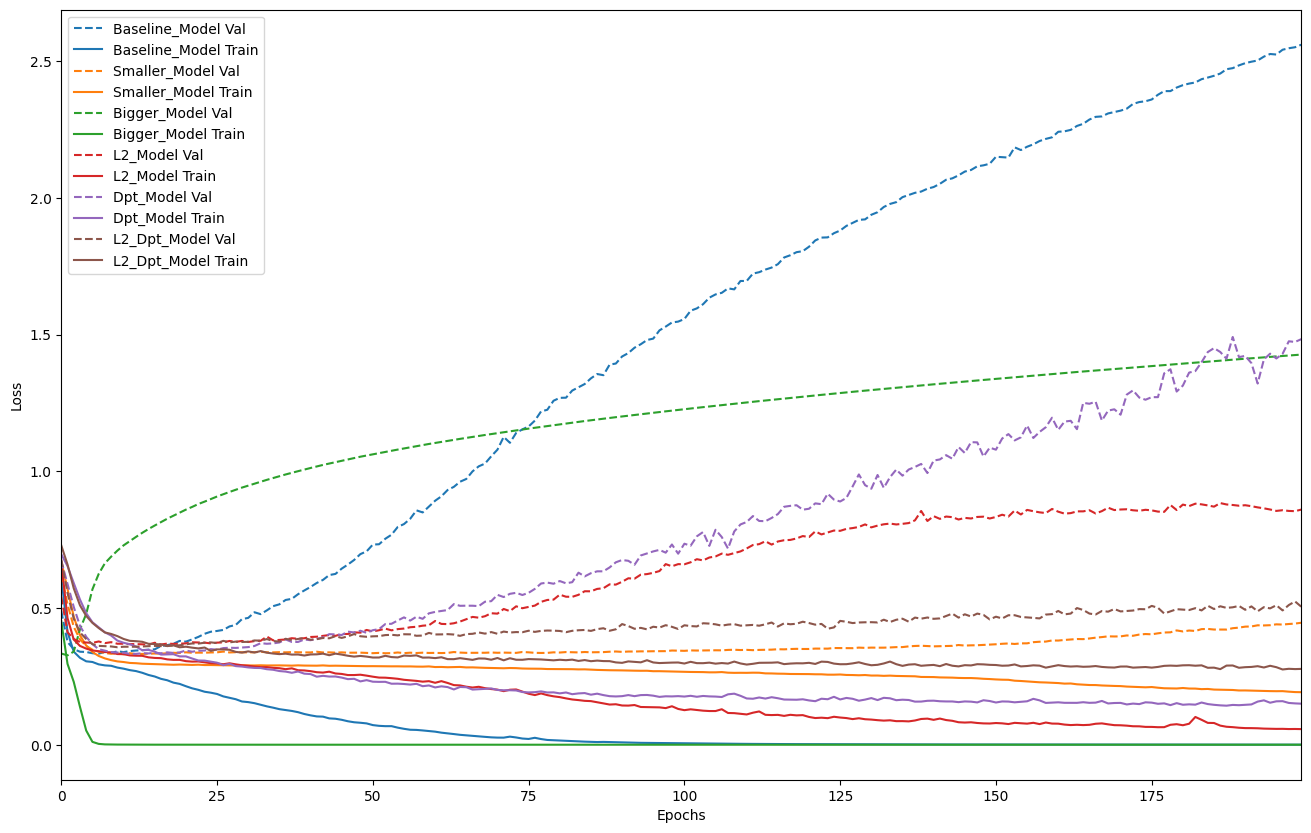

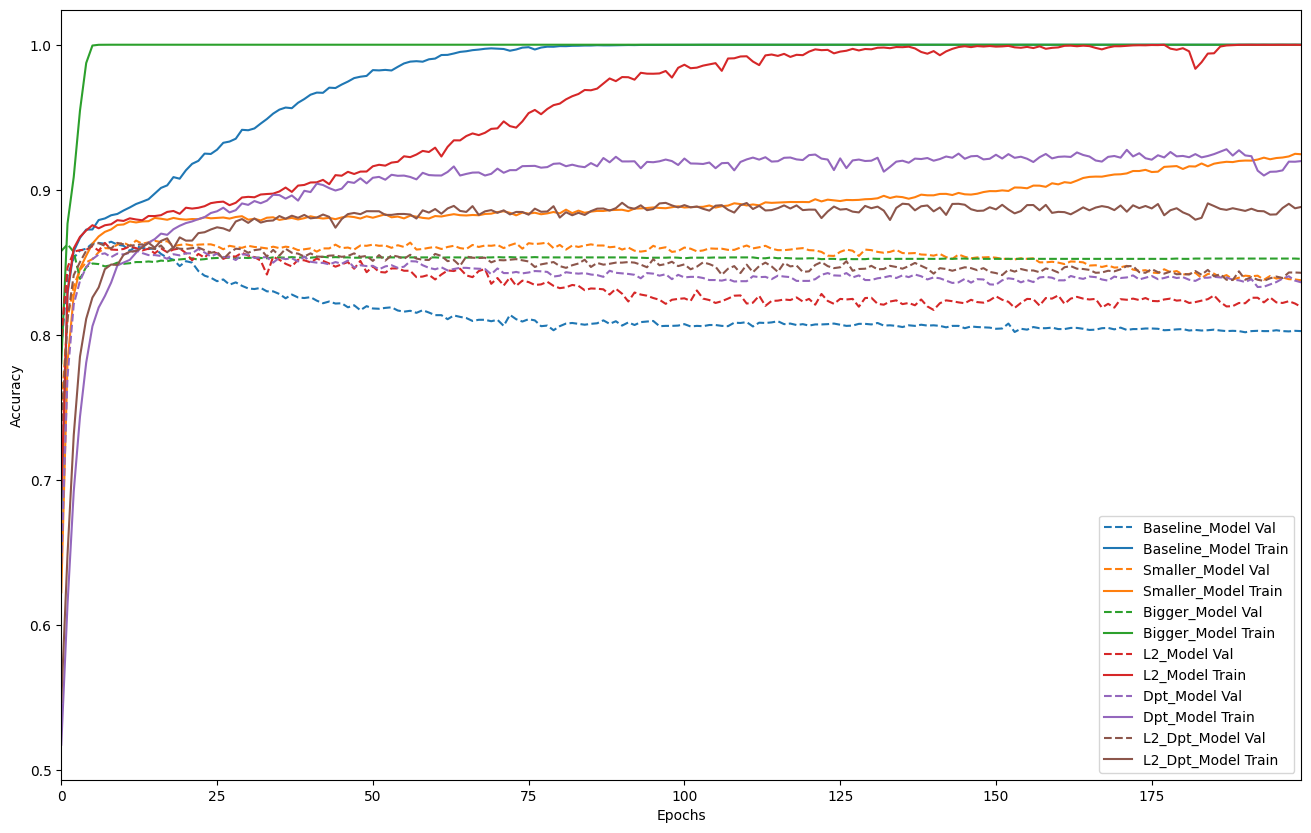

In [68]:
def plot_history(histories, key="loss"):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+" Val")
        plt.plot(history.epoch, history.history[key],
                       color=val[0].get_color(),
                       label=name.title()+ " Train")
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_','').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    plt.show()
    
plot_history(histories.items())  
plot_history(histories.items(), key="accuracy")

## 6. 모델 저장

In [ ]:
best_model = models[best_model_name]
best_model.load_weights(f"model/{best_model_name}.weights.h5")

# 모델을 저장하는 세 가지 방식

# Keras 3 공식 포맷
best_model.save("best_model_keras/best_model.keras")

# HDF5 (이전 Keras 포맷)
best_model.save("best_model_h5/best_model.h5")

# Tensorflow 전용 포맷
tensorflow.saved_model.save(best_model, "best_model/")

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


## 7. 모델 로드

In [ ]:
loaded_model = keras.models.load_model("best_model_keras/best_model.keras")
loaded_model.evaluate(test_datas,test_labels)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8609 - loss: 0.3592


[0.35916051268577576, 0.8608800172805786]